In [29]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [30]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "C:\\Users\\Shraddha\\Downloads\\archive (13)\\leapGestRecog\\leapGestRecog"

In [31]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [32]:
import random
random.shuffle(image_data)


In [33]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


In [34]:
label[:10]

[5, 5, 0, 4, 1, 4, 5, 8, 4, 6]

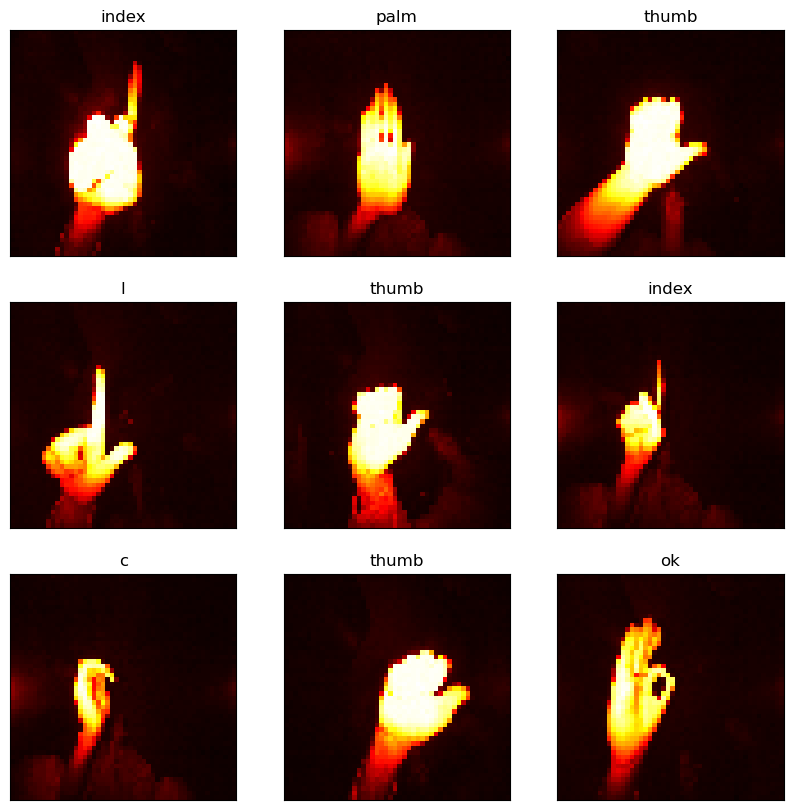

In [35]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [36]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [37]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [38]:
# reshaping the data 
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [39]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [40]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - accuracy: 0.6973 - loss: 0.8777 - val_accuracy: 0.9975 - val_loss: 0.0100
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9920 - loss: 0.0307 - val_accuracy: 0.9988 - val_loss: 0.0039
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.9978 - loss: 0.0091 - val_accuracy: 0.9982 - val_loss: 0.0059
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9991 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9997 - loss: 9.3767e-04 - val_accuracy: 0.9997 - val_loss: 0.0026


In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

In [50]:
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9992 - loss: 0.0019 - val_accuracy: 0.9973 - val_loss: 0.0141
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9958 - val_loss: 0.0181
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0052
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9998 - loss: 3.6455e-04 - val_accuracy: 0.9988 - val_loss: 0.0116


In [51]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


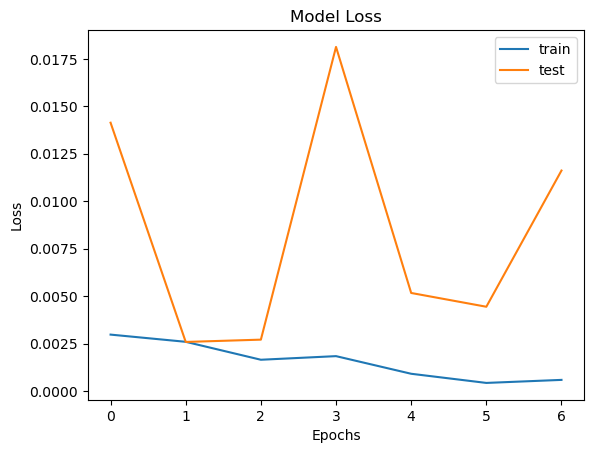

In [52]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

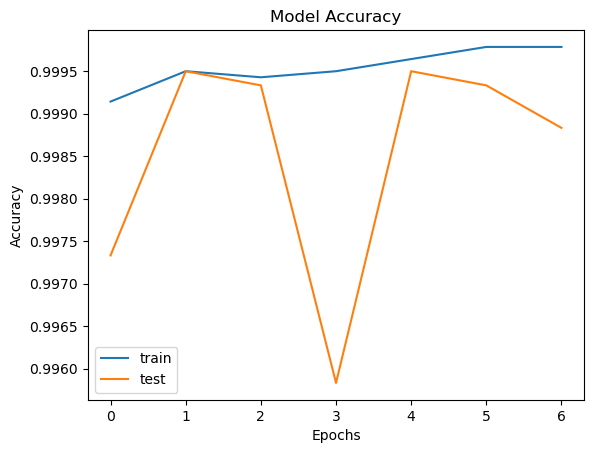

In [53]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [54]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9991 - loss: 0.0081
Test accuracy: 99.88%


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[]

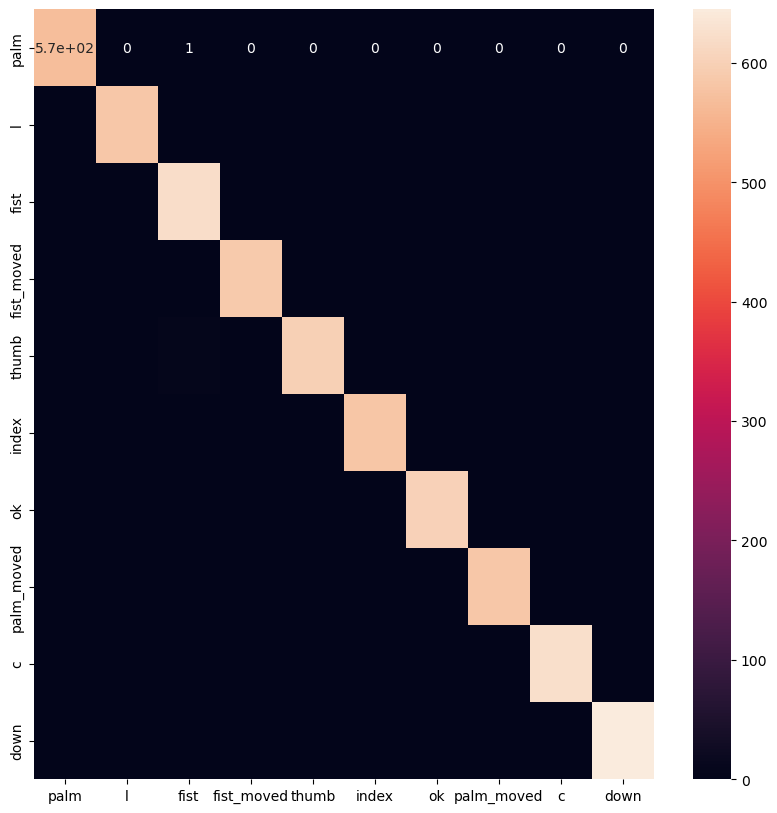

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()